Kinect Test notebook

# Reset Matlab environment

In [1]:
clear all;
close all;

# Get devices

In [2]:
colorDevice = imaq.VideoDevice('kinect',1);
depthDevice = imaq.VideoDevice('kinect',2);

# Capture color & depth image

In [3]:
imgColor = step(colorDevice);
imgDepth = step(depthDevice);

# Point cloud stuff

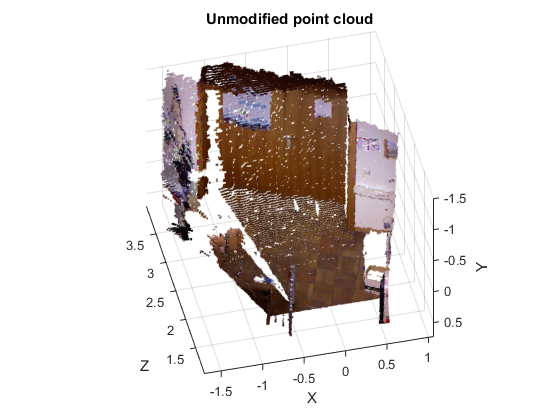

In [4]:
ptCloudAll = pcfromkinect(depthDevice, imgDepth, imgColor);
figure('name', 'Unmodified point cloud');
pcshow(ptCloudAll, 'VerticalAxis', 'Y', 'VerticalAxisDir', 'down');
title('Unmodified point cloud');
xlabel('X');
ylabel('Y');
zlabel('Z');

In [5]:
pcwrite(ptCloudAll, './test.ply')

In [6]:
size(ptCloudAll.Location)


ans =

   480   640     3




# Swap axes

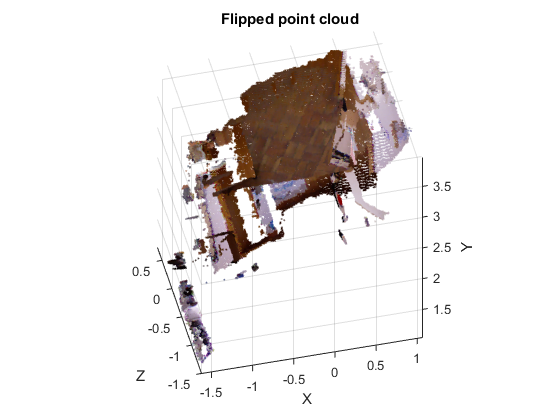

In [7]:
ptCloudFlipped = FlipYZ(ptCloudAll);
figure('name', 'Flipped point cloud');
pcshow(ptCloudFlipped, 'VerticalAxis', 'Y');
title('Flipped point cloud');
xlabel('X');
ylabel('Y');
zlabel('Z');

# Cross profile point cloud

In [8]:
ptCloudLoad = pcread('./test.ply')


ptCloudLoad = 

  pointCloud with properties:

    Location: [239447×3 single]
       Color: [239447×3 uint8]
      Normal: []
       Count: 239447
     XLimits: [-1.6968 1.0590]
     YLimits: [-1.5098 0.7222]
     ZLimits: [1.0400 3.9750]




In [9]:
ptCloudCross = GetCrossProfile(ptCloudLoad);
figure('name', 'Cross profile from point cloud');
pcshow(ptCloudCross, 'VerticalAxis', 'Y');
title('Cross profile from point cloud')
xlabel('X');
ylabel('Y');
zlabel('Z');


  File D:\LC-Laptop\Projects\jupyter notebooks\7. Semester\PartikelbasierteLokalisationsverfahren\GetCrossProfile.m, line 5, in GetCrossProfile
Not enough input arguments.



# Flatten profile

In [10]:
locationFlatten  = ptCloudCross.Location;
locationFlatten(:, 2) = 0;
ptCloudFlattened = pointCloud(locationFlatten);
ptCloudFlattened.Color = ptCloudCross.Color;

Undefined variable "ptCloudCross" or class "ptCloudCross.Location".



Undefined function or variable 'ptCloudFlattened'.



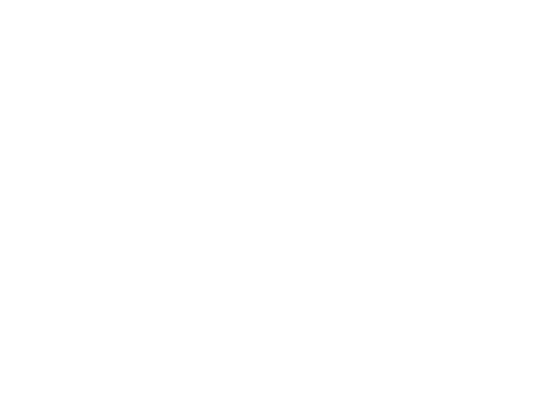

In [11]:
figure('name', 'Flattend cross profile from point cloud');
pcshow(ptCloudFlattened, 'VerticalAxis', 'Y');
title('Flattend cross profile from point cloud');
xlabel('X');
ylabel('Y');
zlabel('Z');

# Release devices to prevent Matlab crash

In [12]:
colorDevice.release();
depthDevice.release();

delete(colorDevice);
delete(depthDevice);

In [13]:
format long g;
(floor(now) - floor(now) / 365 / 4) / 365


ans =

          2018.74785513229


